# Intro to Razor Pages
## When it comes to building web applications with ASP.NET we’re usually able to take two approaches:
## we can take an [MVC (Model-View-Controller)](https://www.codecademy.com/articles/mvc) approach, or more recently, use Razor Pages.
Compared to Razor Pages, the MVC pattern uses a more complex folder structure and requires a deeper understanding of more web framework concepts in order to get started.
With Razor Pages, we don’t have to worry about Controllers, Actions, and Views the same way we would in an MVC app
## we use what we call Pages and PageModels

# _Pages_ and _PagesModels_
## Everything related to a specific "Page" is in one place and _PageModels_ takes care of the processing logic for the the said _Page_ 
## We will refer to _Pages_ as **"_view pages_"** and they will have an _*cshtml_ extension to their filename ( _appHome.cshtml_ )

## _PageModels_ will be referred to as a "_model page_" and will have a _*cshtml.cs_ extension to their filename ( _appHome.cshtml.cs_ )

Razor Pages also has a much more organized file structure; instead of having a whole chain of events in different files when working with MVC, we now simply have a Razor View file, where we can write C# code together with HTML, and a code-behind file (the PageModel) to handle the logic of what the user interacts with.

## Now there is a direct link between the URL of a web page and the physical file location of that page on the server. 

## The URL _https://LearnRazorPages.com/Home/Welcome_ will use the _Welcome.cshtml_ file located in the _/Home_ folder of the root _/Pages_ folder
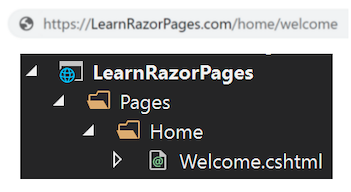

With Razor, we’re able to create dynamic web pages and write C# and HTML together using Razor syntax.

Index.cshtml

In [ ]:
using System;
using System.Collections.Generic;
using System.Linq;
using System.Threading.Tasks;
using Microsoft.AspNetCore.Mvc;
using Microsoft.AspNetCore.Mvc.RazorPages;
using Microsoft.Extensions.Logging;

namespace TestApp.Pages
{
    public class IndexModel : PageModel
    {
        //private readonly ILogger<IndexModel> _logger;

        /*public IndexModel(ILogger<IndexModel> logger)
        {
            _logger = logger;
        }*/

        public string Greet { get; set; }

        public void OnGet()
        {
            Greet = "Hey There!";
        }
    }
}


# Structure of a Razor View Page

In [ ]:
@page
@model IndexModel
@{
    ViewData["Title"] = "Home page";
}

<div class="text-center">
    <h1 class="display-4">@Model.Greet</h1>
    <p>Learn about <a href="https://docs.microsoft.com/aspnet/core">building Web apps with ASP.NET Core</a>.</p>
</div>


/Index.cshtml.cs

The @page directive indicates that the file is a Razor Page and the ASP.NET compiler will treat it as such. This means that we can now write C# code in our view page and HTML markup.

## When a user navigates to a web page, the web browser submits a request to the web server to return the contents of the web page to display to the user.
## That request is handled by the Razor Pages.
## The Razor engine that looks at the view pages (.cshtml) of the specific page produces the HTML content based on the code implemented in that view

## In order for the Razor engine to interpret code as C# instead of HTML, we must prepend the keyword symbol **_@_** otherwise it will read the code as HTML.

# Writing C# in Razor Page
## All C# expressions are preceded with the character @

In [ ]:
<h1> @DateTime.Now.ToShortDateString() </h1>

## If your C# code needs spaces, then it must be wrapped in paratheses

In [ ]:
<p>Last week this time: @(DateTime.Now - TimeSpan.FromDays(7))</p>

## We can use code blocks: 

In [ ]:
@{ // C# code }

## If our code exceeds one line or we want to declare variables

In [ ]:
@{
  int num1 = 6;
  int num2 = 4;
  int result = num1 + num2;
}
 
<h3> The result of @num1 + @num2 is: @result</h3>

# Conditionals in Razor Pages: 
* # If Statements
## You can use If statement pretty much the same way you would in regular C# code

In [ ]:
@{
  int value = 4;
}
 
@if (value % 2 == 0)
{
  <p> The value is even!</p> 
}

## We don't need to prepend the @ to _else if_ or _else_

In [ ]:
@if (value % 2 == 0)
{
  <p>The value was even.</p>
}
else if (value >= 1337)
{
  <p>The value is large.</p>
}
else
{
  <p>The value is odd and small.</p>
}

* # Switch Statements

In [ ]:
@{ int number = 2 }
 
@switch (number)
{
  case 1: <h1>The value is 1!</h1>
  break;
  case 2: <h1>The value is 2!</h1>
  break;
  default: ...
}

# Working with Loops
## Let’s say we have a list of names we’ll be looping over:


In [ ]:
@{
  List<string> names = new List<string>()
  {
    "Scott Allen",
    "James Dorf",
    "Tim Alston",
    "Jane Rashid",
    "John Doe"
  };
}

## We can iterate over the names with a _for loop_ which is useful when we need to keep track of how far in the looping process we are:

In [ ]:
<ul>
  @for (int i = 0; i < names.Count; i++)
  {
    <li>@names[i]</li>
  }
</ul>

* The < **ul** > HTML element represent an _unordered list of items_, typically rendered as a bulleted list.
* The < **li** > HTML element represent an _item in a list_. It must be contained in a parent element such as a  <**ol**> ordered list, or a < **ul** > or a < **menu** >


Resulting HTML from the above example:

In [ ]:
<ul>
  <li>Scott Allen</li>
  <li>James Dorf</li>
  <li>Tim Alston</li>
  <li>Jane Rashid</li>
  <li>John Doe</li>
</ul>

## Similarly, we can use a _foreach_ loop:

In [ ]:
<ul>
  @foreach(string name in names)
  {
    <li>@name</li>
  }
</ul>

## Lastly, we can iterate over the names with a _while_ loop:

In [ ]:
<ul>
  @{ 
    int counter = 0;
  }
  @while(counter < names.Count)
  {
    <li>@names[counter++]</li>
  }
</ul>